In [2]:
import numpy as np
from bayspec.model.local import *
from bayspec.model.astro import *
from bayspec import DataUnit, Data, Infer, Plot

In [3]:
savepath = 'intermediate'

In [4]:
le = DataUnit(
    src='./LE/le2.src', 
    bkg='./LE/le2.bkg', 
    rmf='./LE/le2.rmf', 
    arf='./LE/le2.arf', 
    notc=[0.5, 4], 
    stat='cstat', 
    grpg={'min_nevt': 5})

me = DataUnit(
    src='./ME/me2.src', 
    bkg='./ME/me2.bkg', 
    rsp='./ME/me2.rsp', 
    notc=[8, 900], 
    stat='pgstat', 
    rebn={'min_nevt': 50})

data = Data([('LE', le), ('ME', me)])

data.save(savepath)
print(data)

╒════════╤════════════╤═════════════╤═════════════════╤════════╕
│  Name  │  Noticing  │  Statistic  │    Grouping     │  Time  │
╞════════╪════════════╪═════════════╪═════════════════╪════════╡
│   LE   │ [[0.5, 4]] │    cstat    │ {'min_nevt': 5} │  None  │
├────────┼────────────┼─────────────┼─────────────────┼────────┤
│   ME   │ [[8, 900]] │   pgstat    │      None       │  None  │
╘════════╧════════════╧═════════════╧═════════════════╧════════╛
╒════════╤═════════════╤═════════════╤═════════╤═════════╤══════════╕
│  par#  │  Component  │  Parameter  │  Value  │  Prior  │  Frozen  │
╞════════╪═════════════╪═════════════╪═════════╪═════════╪══════════╡
│   1    │     LE      │     sf      │    1    │  None   │   True   │
├────────┼─────────────┼─────────────┼─────────┼─────────┼──────────┤
│   2    │     LE      │     bf      │    1    │  None   │   True   │
├────────┼─────────────┼─────────────┼─────────┼─────────┼──────────┤
│   3    │     LE      │     rf      │    1    │  None 

In [5]:
tbabs_ins = AS_TbAbs()

cpl_ins = cpl()

model = tbabs_ins * cpl_ins

model.save(savepath)
print(model)

(AS_TbAbs*cpl) [add]
AS_TbAbs: Photometric absorption (Tbabs implementation), f(E) = exp(- NH * sigma(E)) contributed by Dominique Eckert
cpl: cutoff power law model
╒════════╤═════════════╤═════════════╤═════════╕
│  cfg#  │  Component  │  Parameter  │  Value  │
╞════════╪═════════════╪═════════════╪═════════╡
│   1    │  AS_TbAbs   │  redshift   │    0    │
├────────┼─────────────┼─────────────┼─────────┤
│   2    │     cpl     │  redshift   │    0    │
╘════════╧═════════════╧═════════════╧═════════╛
╒════════╤═════════════╤═════════════╤═════════╤══════════════════╤══════════╕
│  par#  │  Component  │  Parameter  │  Value  │      Prior       │  Frozen  │
╞════════╪═════════════╪═════════════╪═════════╪══════════════════╪══════════╡
│   1    │  AS_TbAbs   │     NH      │    1    │ unif(0.0001, 20) │  False   │
├────────┼─────────────┼─────────────┼─────────┼──────────────────┼──────────┤
│   2    │     cpl     │  $\alpha$   │   -1    │   unif(-8, 4)    │  False   │
├────────┼───────

In [6]:
infer = Infer([(data, model)])
infer.save(savepath)
print(infer)

╒════════╤═════════╤════════════════╤═════════════╤═════════════╤═════════╕
│  cfg#  │  Class  │   Expression   │  Component  │  Parameter  │  Value  │
╞════════╪═════════╪════════════════╪═════════════╪═════════════╪═════════╡
│   1    │  model  │ (AS_TbAbs*cpl) │  AS_TbAbs   │  redshift   │    0    │
├────────┼─────────┼────────────────┼─────────────┼─────────────┼─────────┤
│   2    │  model  │ (AS_TbAbs*cpl) │     cpl     │  redshift   │    0    │
╘════════╧═════════╧════════════════╧═════════════╧═════════════╧═════════╛
╒════════╤═════════╤════════════════╤═════════════╤═════════════╤═════════╤══════════════════╕
│  par#  │  Class  │   Expression   │  Component  │  Parameter  │  Value  │      Prior       │
╞════════╪═════════╪════════════════╪═════════════╪═════════════╪═════════╪══════════════════╡
│   1*   │  model  │ (AS_TbAbs*cpl) │  AS_TbAbs   │     NH      │    1    │ unif(0.0001, 20) │
├────────┼─────────┼────────────────┼─────────────┼─────────────┼─────────┼─────────────

In [7]:
post = infer.emcee(nstep=1000, discard=200, resume=True, savepath=savepath)
print(post)

╒════════╤═════════╤════════════════╤═════════════╤═════════════╤════════╤══════════╤════════╤══════════════════╕
│  par#  │  Class  │   Expression   │  Component  │  Parameter  │  Mean  │  Median  │  Best  │    1sigma CI     │
╞════════╪═════════╪════════════════╪═════════════╪═════════════╪════════╪══════════╪════════╪══════════════════╡
│   1    │  model  │ (AS_TbAbs*cpl) │  AS_TbAbs   │     NH      │ 1.141  │  1.135   │ 1.079  │  [0.946, 1.335]  │
├────────┼─────────┼────────────────┼─────────────┼─────────────┼────────┼──────────┼────────┼──────────────────┤
│   2    │  model  │ (AS_TbAbs*cpl) │     cpl     │  $\alpha$   │ -1.685 │  -1.695  │ -1.656 │ [-1.759, -1.609] │
├────────┼─────────┼────────────────┼─────────────┼─────────────┼────────┼──────────┼────────┼──────────────────┤
│   3    │  model  │ (AS_TbAbs*cpl) │     cpl     │ log$E_{c}$  │  3.07  │  3.027   │ 2.716  │  [2.529, 3.679]  │
├────────┼─────────┼────────────────┼─────────────┼─────────────┼────────┼──────────┼───

In [8]:
fig = Plot.infer(post, style='CE')
fig.save(f'{savepath}/ctsspec')

In [9]:
fig = Plot.infer(post, style='NE')
fig.save(f'{savepath}/phtspec')

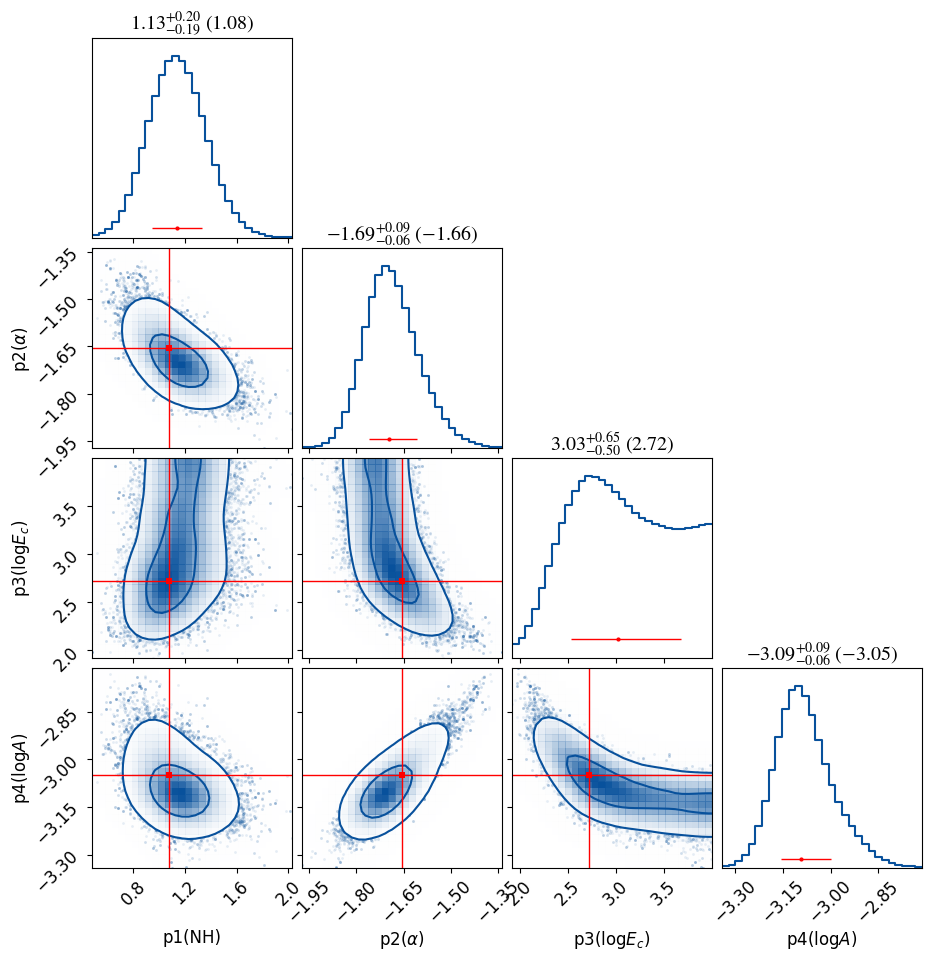

In [10]:
fig = Plot.post_corner(post, ploter='cornerpy')
fig.save(f'{savepath}/corner')

In [11]:
earr = np.logspace(np.log10(0.5), 4, 100)

modelplot = Plot.model(ploter='plotly', style='vFv', CI=True)
modelplot.add_model(model, E=earr)
modelplot.add_model(cpl_ins, E=earr)
fig = modelplot.get_fig()
fig.save(f'{savepath}/model')